TUTORIAL CONFRONTO IMMAGINI LBP: https://stackoverflow.com/questions/51239715/compare-the-lbp-in-python

[[128. 241. 224. ... 193. 193.  96.]
 [199.   1.   0. ...  67.   1.   0.]
 [  0.  30.  31. ...   2. 191.  12.]
 ...
 [ 64. 124. 191. ... 240. 243.  68.]
 [ 64. 120. 127. ... 112. 248. 112.]
 [  0.  24.  24. ...  24.  24.  16.]]


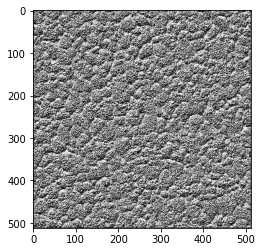

[[193.  64. 112. ... 193.  96.  48.]
 [195.  96.  56. ... 131.   0. 124.]
 [193.   0. 124. ...   7.   4.  56.]
 ...
 [ 68. 120.  63. ... 240. 243.  64.]
 [ 64. 248. 255. ...  48. 187.   0.]
 [  0.  24.  25. ...  28.  31.   4.]]


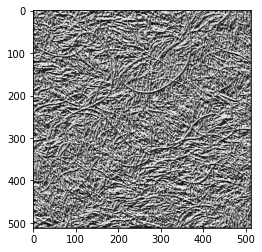

[[192. 240. 112. ... 225. 193.  64.]
 [192. 240. 240. ... 227. 195.  64.]
 [192. 240. 240. ... 227. 193.   0.]
 ...
 [199. 231. 230. ... 193. 224. 112.]
 [193. 225. 224. ... 193. 224. 112.]
 [  1.   0.  16. ...   1.   0.  16.]]


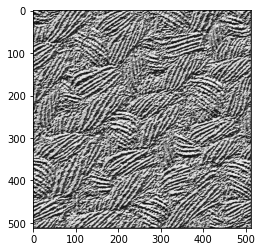

In [14]:
import numpy as np
from skimage import io, color
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

def lbp_histogram(color_image):
    img = color.rgb2gray(color_image)
    patterns = local_binary_pattern(img, 8, 1)
    print(patterns)
    plt.imshow(patterns, cmap ="gray")
    plt.show()
    hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)
    return hist

couscous = io.imread('./u3xLI.png')
knitwear = io.imread('./Zj14J.png')
unknown = io.imread('./JwP3j.png')

couscous_feats = lbp_histogram(couscous)
knitwear_feats = lbp_histogram(knitwear)
unknown_feats = lbp_histogram(unknown)

In [15]:
from scipy.spatial.distance import euclidean

In [16]:
euclidean(unknown_feats, couscous_feats)

0.10165855059354262

In [17]:
euclidean(unknown_feats, knitwear_feats)

0.08874929367768886

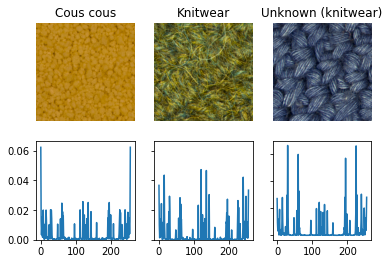

In [18]:
import matplotlib.pyplot as plt

hmax = max([couscous_feats.max(), knitwear_feats.max(), unknown_feats.max()])
fig, ax = plt.subplots(2, 3)

ax[0, 0].imshow(couscous)
ax[0, 0].axis('off')
ax[0, 0].set_title('Cous cous')
ax[1, 0].plot(couscous_feats)
ax[1, 0].set_ylim([0, hmax])

ax[0, 1].imshow(knitwear)
ax[0, 1].axis('off')
ax[0, 1].set_title('Knitwear')
ax[1, 1].plot(knitwear_feats)
ax[1, 1].set_ylim([0, hmax])
ax[1, 1].axes.yaxis.set_ticklabels([])

ax[0, 2].imshow(unknown)
ax[0, 2].axis('off')
ax[0, 2].set_title('Unknown (knitwear)')
ax[1, 2].plot(unknown_feats)
ax[1, 1].set_ylim([0, hmax])
ax[1, 2].axes.yaxis.set_ticklabels([])

plt.show(fig)
